IMPORTS NECESSÁRIOS

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


CARREGANDO OS DADOS

Entendimento Inicial dos Dados



*   Quais atributos e instâncias existem?
*   Quais os tipos de dados dos atributos?
*   Verificar primeiras linhas do dataset. Há algo de errado?
*   Há valor faltante, discrepante ou inconsistente?
*   Realizar resumo estatístico dos atributos com valor numérico.





In [26]:
url_dados = 'https://raw.githubusercontent.com/isabelanramos/Data-Science-PUC-RJ/main/Sprint_3_MVP/Initial_Data.csv'
teste = pd.read_csv(url_dados)
print(teste.head())


   CustomerID             Name                        Email  \
0           1     Shane Clarke  williamscynthia@example.com   
1           2       Scott Long                          NaN   
2           3  Reginald Willis    marshalllinda@example.com   
3           4     Erika Cooper     fishercalvin@example.com   
4           5        Linda Day         collin73@example.net   

            PhoneNumber                                            Address  \
0    (551)626-0650x4340  9901 Laura Stream Suite 214, East Denise, HI 0...   
1    (527)838-9348x8646            544 Lewis Course, Melissaland, CT 65007   
2  001-801-543-5601x151                   PSC 3113, Box 9049, APO AE 80754   
3          932-654-7267           58803 Gutierrez Via, West John, OK 94095   
4          506.880.7120      0031 Russell Estate, Port Meganport, VT 33328   

   PurchaseAmount PurchaseDate             BookTitle  
0          276.66     7/7/2023          Church seem.  
1          359.02    2/13/2023           E

In [27]:
labels_atributos = ['CustomerID', 'Name', 'Email', 'PhoneNumber', 'Address', 'PurchaseAmount', 'PurchaseDate', 'BookTitle']
iris = pd.read_csv(url_dados, names=labels_atributos)
iris.head()


,CustomerID,Name,Email,PhoneNumber,Address,PurchaseAmount,PurchaseDate,BookTitle
0,CustomerID,Name,Email,PhoneNumber,Address,PurchaseAmount,PurchaseDate,BookTitle
1,1,Shane Clarke,williamscynthia@example.com,(551)626-0650x4340,"9901 Laura Stream Suite 214, East Denise, HI 0...",276.66,7/7/2023,Church seem.
2,2,Scott Long,NaN,(527)838-9348x8646,"544 Lewis Course, Melissaland, CT 65007",359.02,2/13/2023,Everything.
3,3,Reginald Willis,marshalllinda@example.com,001-801-543-5601x151,"PSC 3113, Box 9049, APO AE 80754",303.37,11/12/2023,Weight dinner since.
4,4,Erika Cooper,fishercalvin@example.com,932-654-7267,"58803 Gutierrez Via, West John, OK 94095",274.72,10/5/2023,Light professional.


Nessa primeira análise das linhas já é possível notar há presença de um NaN na coluna Email. Isso nos mostra que há dados a serem tratados, seja eliminando-os ou substituindo-os.

Podemos ver também que o nomes das colunas está sendo repetido na linha 0.

In [28]:
iris.tail()

,CustomerID,Name,Email,PhoneNumber,Address,PurchaseAmount,PurchaseDate,BookTitle
1996,1996,Steven Fitzgerald,rmcclure@example.com,(480)455-4161x83673,"145 Cox River, West Aaronborough, IA 06789",396.68,10/29/2023,Civil simple really.
1997,1997,Sean Rice,jonathangraham@example.com,001-820-965-0812x555,"825 Sullivan Throughway, Williamsstad, LA 16803",361.99,6/3/2023,She per yard but.
1998,1998,Lindsey Montgomery,nrodriguez@example.org,(387)623-9178x697,NaN,242.65,9/4/2023,Whether growth particularly.
1999,1999,Emma Leach,robertsonjeffrey@example.net,213.523.2093,"548 Nichols Ways, South Michellefort, NV 91526",323.71,7/26/2023,However radio.
2000,2000,Brian Gutierrez,stacywilson@example.net,395.985.0555x3212,NaN,253.38,9/2/2023,Process yeah challenge.


O mesmo ocorre para os últimos dados

In [29]:
#Exibindo dimensões do dataset
iris.shape

(2001, 8)

In [30]:
#Exibindo quantidade de linhas por coluna
iris.count()

,0
CustomerID,2001
Name,2001
Email,1816
PhoneNumber,1807
Address,1789
PurchaseAmount,2001
PurchaseDate,2001
BookTitle,2001


Isso nos mostra que há valores nulos para as colunas que não apresentam no total de não nulos = 2001, sendo elas: **Email, PhoneNumber, Address**. Será necessário tratá-las futuramente.

In [31]:
#Sumario estatistico

iris.describe()

,CustomerID,Name,Email,PhoneNumber,Address,PurchaseAmount,PurchaseDate,BookTitle
count,2001,2001,1816,1807,1789,2001,2001,2001
unique,2001,1929,1811,1807,1789,1970,365,1983
top,CustomerID,Michael Smith,ashley49@example.com,PhoneNumber,Address,161.69,9/10/2023,Recognize.
freq,1,4,2,1,1,3,13,3


"Name" é uma coluna que não contém nulos, porém possui 1929 valores únicos. Isso mostra que há clientes realizando mais de uma compra, ou que, pelo menos, clientes com o mesmo nome relizando mais de uma compra. Porém com o dado de que todos os números de contato registrados são únicos, é provável que não haja clientes com o mesmo nome. Vemos também que o livro mais vendido é o "Recognize" com 3 vendas. O nome que aparece como o maior comprador do ano é "Michael Smith".

In [32]:
print(iris.dtypes)

CustomerID        object
Name              object
Email             object
PhoneNumber       object
Address           object
PurchaseAmount    object
PurchaseDate      object
BookTitle         object
dtype: object


Limpeza dos Dados

In [33]:
iris['PurchaseAmount'] = pd.to_numeric(iris['PurchaseAmount'], errors='coerce')
iris['PurchaseDate'] = pd.to_datetime(iris['PurchaseDate'], errors='coerce')


Passar "PurchaseAmount" para numeric é uma escolha visando trazer melhor performance ao conjunto, reduzindo, também, a memória. Já "PurchaseDate" visa uma transformação futura para separar em colunas de dia, mes e ano, assim como dia de semana e trimestre.

In [34]:
#Preenchendo nulos
iris = iris.fillna({'Email': 'missing@example.com', 'PhoneNumber': '000-000-0000', 'Address': 'Unknown'})

#Removendo duplicatas
iris.drop_duplicates()

,CustomerID,Name,Email,PhoneNumber,Address,PurchaseAmount,PurchaseDate,BookTitle
0,CustomerID,Name,Email,PhoneNumber,Address,NaN,NaT,BookTitle
1,1,Shane Clarke,williamscynthia@example.com,(551)626-0650x4340,"9901 Laura Stream Suite 214, East Denise, HI 0...",276.66,2023-07-07,Church seem.
2,2,Scott Long,missing@example.com,(527)838-9348x8646,"544 Lewis Course, Melissaland, CT 65007",359.02,2023-02-13,Everything.
3,3,Reginald Willis,marshalllinda@example.com,001-801-543-5601x151,"PSC 3113, Box 9049, APO AE 80754",303.37,2023-11-12,Weight dinner since.
4,4,Erika Cooper,fishercalvin@example.com,932-654-7267,"58803 Gutierrez Via, West John, OK 94095",274.72,2023-10-05,Light professional.
...,...,...,...,...,...,...,...,...
1996,1996,Steven Fitzgerald,rmcclure@example.com,(480)455-4161x83673,"145 Cox River, West Aaronborough, IA 06789",396.68,2023-10-29,Civil simple really.
1997,1997,Sean Rice,jonathangraham@example.com,001-820-965-0812x555,"825 Sullivan Throughway, Williamsstad, LA 16803",361.99,2023-06-03,She per yard but.
1998,1998,Lindsey Montgomery,nrodriguez@example.org,(387)623-9178x697,Unknown,242.65,2023-09-04,Whether growth particularly.
1999,1999,Emma Leach,robertsonjeffrey@example.net,213.523.2093,"548 Nichols Ways, South Michellefort, NV 91526",323.71,2023-07-26,However radio.


Transformei os nulos ao invés de deletá-los para evitar perder dados importantes de outras colunas. Tirei as duplicatas para evitar redundâncias.

<Axes: >

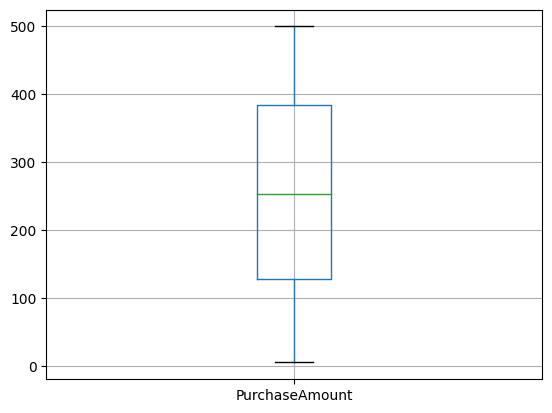

In [35]:
#Checar possiveis outliers
iris.boxplot(column=['PurchaseAmount'])


Nenhum outlier identificado inicialmente.

Text(0, 0.5, 'Purchase Amount')

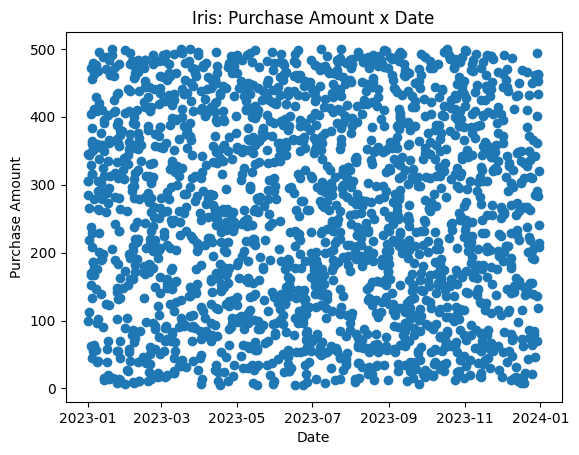

In [36]:
plt.scatter(iris['PurchaseDate'], iris['PurchaseAmount'])
plt.title('Iris: Purchase Amount x Date')
plt.xlabel('Date')
plt.ylabel('Purchase Amount')

Dados bem distribuídos como é de se esperar de uma base de treino para iniciantes.

Text(0.5, 0, 'Date')

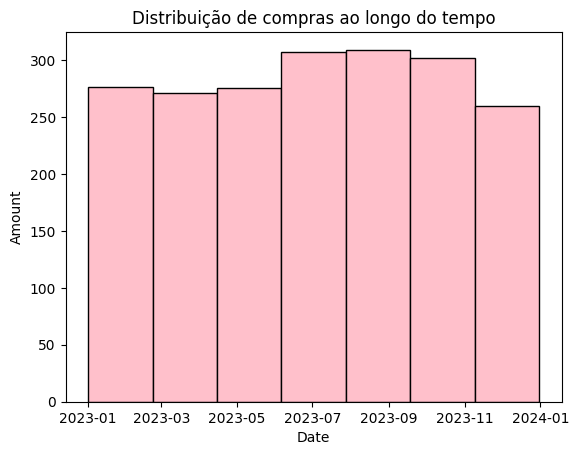

In [37]:
plt.hist(iris['PurchaseDate'], bins = 7, edgecolor = 'black', color = 'pink')
plt.title('Distribuição de compras ao longo do tempo')
plt.ylabel('Amount')
plt.xlabel('Date')

Como análise inicial, podemos perceber que há maior venda ao final do ano de 2023, assim como maior venda em janeiro de 2023 do que em 2024. Porém a hipótese de que seja por conta da proximidade com a pandemia não parece ser muito válida visto que os valores vem a subir com o fim do ano. Isso pode, por outro lado, comprovar a hipótese de maior venda com a proximidade ao Natal. Porém isso será melhor analisado com a criação das colunas de trimestre e mes.

In [38]:
# Extraindo dia, mes e ano da coluna de data
iris['Dia'] = iris['PurchaseDate'].dt.day
iris['Mes'] = iris['PurchaseDate'].dt.month
iris['Ano'] = iris['PurchaseDate'].dt.year

# Extraindo o trimestre
iris['Trimestre'] = iris['PurchaseDate'].dt.quarter

# Extraindo o dia da semana
iris['Dia_da_Semana'] = iris['PurchaseDate'].dt.day_name()


In [39]:
# Apagando a primeira linha do DataFrame
iris = iris.iloc[1:].reset_index(drop=True)


In [40]:
#Definindo datatype das novas colunas
iris['Dia'] = pd.to_numeric(iris['Dia'], errors='coerce').astype(int)
iris['Mes'] = pd.to_numeric(iris['Mes'], errors='coerce').astype(int)
iris['Ano'] = pd.to_numeric(iris['Ano'], errors='coerce').astype(int)
iris['Trimestre'] = pd.to_numeric(iris['Trimestre'], errors='coerce').astype(int)


In [41]:
iris.head()

,CustomerID,Name,Email,PhoneNumber,Address,PurchaseAmount,PurchaseDate,BookTitle,Dia,Mes,Ano,Trimestre,Dia_da_Semana
0,1,Shane Clarke,williamscynthia@example.com,(551)626-0650x4340,"9901 Laura Stream Suite 214, East Denise, HI 0...",276.66,2023-07-07,Church seem.,7,7,2023,3,Friday
1,2,Scott Long,missing@example.com,(527)838-9348x8646,"544 Lewis Course, Melissaland, CT 65007",359.02,2023-02-13,Everything.,13,2,2023,1,Monday
2,3,Reginald Willis,marshalllinda@example.com,001-801-543-5601x151,"PSC 3113, Box 9049, APO AE 80754",303.37,2023-11-12,Weight dinner since.,12,11,2023,4,Sunday
3,4,Erika Cooper,fishercalvin@example.com,932-654-7267,"58803 Gutierrez Via, West John, OK 94095",274.72,2023-10-05,Light professional.,5,10,2023,4,Thursday
4,5,Linda Day,collin73@example.net,506.880.7120,"0031 Russell Estate, Port Meganport, VT 33328",214.71,2023-12-31,Decide.,31,12,2023,4,Sunday


Agora é possível realizar maiores análises.

Text(0.5, 0, 'Trimestre')

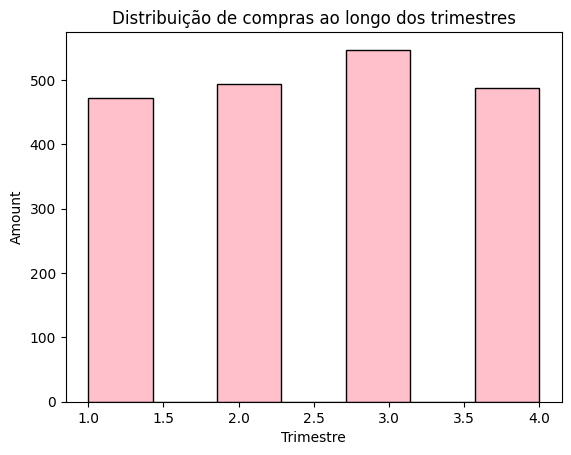

In [42]:
plt.hist(iris['Trimestre'], bins = 7, edgecolor = 'black', color = 'pink')
plt.title('Distribuição de compras ao longo dos trimestres')
plt.ylabel('Amount')
plt.xlabel('Trimestre')

Conclui-se, portanto, que o terceiro trimestre é o maior em vendas. Isso não possui nenhuma analogia com o Natal ou início das aulas no início do ano. Descarta-se, portanto, as hipóteses iniciais.

Text(0.5, 0, 'Ano')

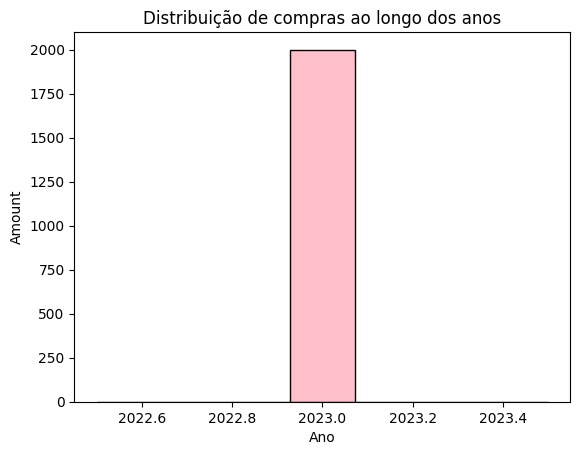

In [43]:
plt.hist(iris['Ano'], bins = 7, edgecolor = 'black', color = 'pink')
plt.title('Distribuição de compras ao longo dos anos')
plt.ylabel('Amount')
plt.xlabel('Ano')

Não há como realizar a análise entre janeiro de 2023 e de 2024, visto que nossa base possui apenas dados para 2023.

**RELAÇÃO COM REGIÕES DO BRASIL**

In [44]:
# Extraindo coluna DDD
iris['DDD'] = iris['PhoneNumber'].str.extract(r'\((\d+)\)')


In [45]:
iris.head()

,CustomerID,Name,Email,PhoneNumber,Address,PurchaseAmount,PurchaseDate,BookTitle,Dia,Mes,Ano,Trimestre,Dia_da_Semana,DDD
0,1,Shane Clarke,williamscynthia@example.com,(551)626-0650x4340,"9901 Laura Stream Suite 214, East Denise, HI 0...",276.66,2023-07-07,Church seem.,7,7,2023,3,Friday,551
1,2,Scott Long,missing@example.com,(527)838-9348x8646,"544 Lewis Course, Melissaland, CT 65007",359.02,2023-02-13,Everything.,13,2,2023,1,Monday,527
2,3,Reginald Willis,marshalllinda@example.com,001-801-543-5601x151,"PSC 3113, Box 9049, APO AE 80754",303.37,2023-11-12,Weight dinner since.,12,11,2023,4,Sunday,NaN
3,4,Erika Cooper,fishercalvin@example.com,932-654-7267,"58803 Gutierrez Via, West John, OK 94095",274.72,2023-10-05,Light professional.,5,10,2023,4,Thursday,NaN
4,5,Linda Day,collin73@example.net,506.880.7120,"0031 Russell Estate, Port Meganport, VT 33328",214.71,2023-12-31,Decide.,31,12,2023,4,Sunday,NaN


Há nulos para tratar

In [46]:
iris = iris.fillna({'DDD': 'Desconhecido'})

In [47]:
iris.head()

,CustomerID,Name,Email,PhoneNumber,Address,PurchaseAmount,PurchaseDate,BookTitle,Dia,Mes,Ano,Trimestre,Dia_da_Semana,DDD
0,1,Shane Clarke,williamscynthia@example.com,(551)626-0650x4340,"9901 Laura Stream Suite 214, East Denise, HI 0...",276.66,2023-07-07,Church seem.,7,7,2023,3,Friday,551
1,2,Scott Long,missing@example.com,(527)838-9348x8646,"544 Lewis Course, Melissaland, CT 65007",359.02,2023-02-13,Everything.,13,2,2023,1,Monday,527
2,3,Reginald Willis,marshalllinda@example.com,001-801-543-5601x151,"PSC 3113, Box 9049, APO AE 80754",303.37,2023-11-12,Weight dinner since.,12,11,2023,4,Sunday,Desconhecido
3,4,Erika Cooper,fishercalvin@example.com,932-654-7267,"58803 Gutierrez Via, West John, OK 94095",274.72,2023-10-05,Light professional.,5,10,2023,4,Thursday,Desconhecido
4,5,Linda Day,collin73@example.net,506.880.7120,"0031 Russell Estate, Port Meganport, VT 33328",214.71,2023-12-31,Decide.,31,12,2023,4,Sunday,Desconhecido


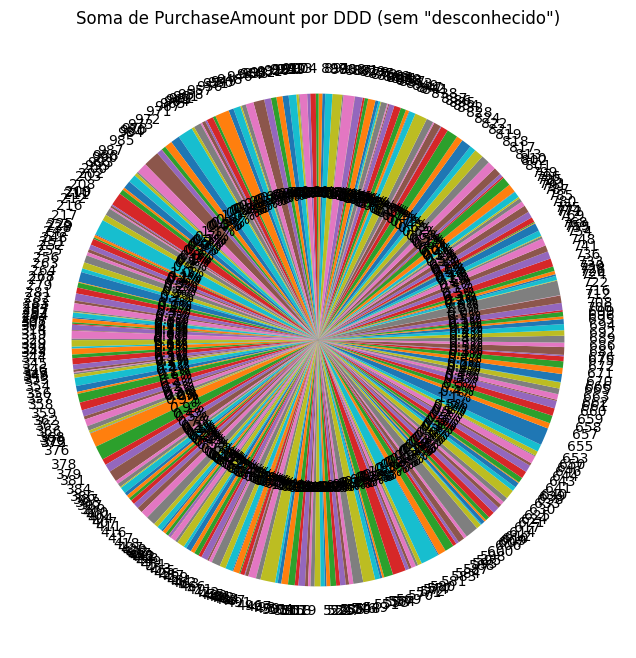

In [48]:
# Filtrando DDDs 'desconhecidos'
ddd_purchase_sum = iris.groupby('DDD')['PurchaseAmount'].sum()

# Removendo DDDs desconhecidos (por exemplo, NaN ou valores específicos)
ddd_purchase_sum = ddd_purchase_sum[ddd_purchase_sum.index != 'Desconhecido']  # Exemplo para remover um valor específico

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(ddd_purchase_sum, labels=ddd_purchase_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Soma de PurchaseAmount por DDD (sem "desconhecido")')
plt.show()

Vemos que o gráfico de pizza não é a melhor forma de representar a análise que buscamos.

In [49]:
# Agrupando por DDD e somando os valores de PurchaseAmount
ddd_purchase_sum = iris.groupby('DDD')['PurchaseAmount'].sum()
ddd_purchase_sum = ddd_purchase_sum[ddd_purchase_sum.index != 'Desconhecido']  # Exemplo para remover um valor específico

# Encontrando o DDD com a maior soma de PurchaseAmount
ddd_max = ddd_purchase_sum.idxmax()
max_value = ddd_purchase_sum.max()

print(f"O DDD com a maior soma de PurchaseAmount é {ddd_max} com um total de {max_value}.")


O DDD com a maior soma de PurchaseAmount é 581 com um total de 1124.1100000000001.


Não é possível validar se um estado do Nordeste (segundo minha hipótese documentada no word) é o responsável pela maior compra, pois o DDD 581 não está associado a nenhuma região do Brasil. Provável que seja devido ao fato da base ser apenas para exercício a iniciantes.

**DESCOBRIR O DIA DA SEMANA QUE POSSUI MAIS VENDA**

In [50]:
# Agrupando por DDD e somando os valores de PurchaseAmount
semana_purchase_sum = iris.groupby('Dia_da_Semana')['PurchaseAmount'].sum()

# Encontrando o DDD com a maior soma de PurchaseAmount
semana_max = semana_purchase_sum.idxmax()
max_value = semana_purchase_sum.max()

print(f"O dia da semana com a maior soma de PurchaseAmount é {semana_max} com um total de {max_value}.")

O dia da semana com a maior soma de PurchaseAmount é Monday com um total de 78047.31.


Isso vai contra a hipótese de que sábado seria o dia de mais venda, porém irei realizar uma outra análise para ver o top 3 dias mais vendidos.

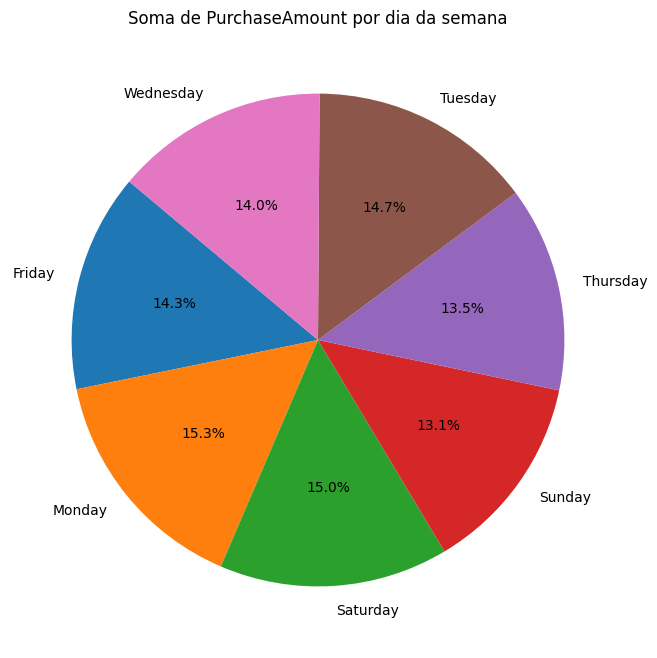

In [51]:
# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(semana_purchase_sum, labels=semana_purchase_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Soma de PurchaseAmount por dia da semana')
plt.show()

Vemos que o TOP 3 é constituído por: Segunda, Sábado e Terça. Sábado está, portanto, entre os dias mais vendidos.